# Start here!

In [1]:
%matplotlib inline
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
from datasets import load_dataset
from transformers import DetrFeatureExtractor
dataset = load_dataset("Francesco/trail-camera")
dataset

DatasetDict({
    train: Dataset({
        features: ['image_id', 'image', 'width', 'height', 'objects'],
        num_rows: 941
    })
    validation: Dataset({
        features: ['image_id', 'image', 'width', 'height', 'objects'],
        num_rows: 131
    })
    test: Dataset({
        features: ['image_id', 'image', 'width', 'height', 'objects'],
        num_rows: 239
    })
})

In [2]:
img = dataset["train"][2]["image"]
img.size

(640, 640)

In [3]:
feature_extractor = DetrFeatureExtractor.from_pretrained('facebook/detr-resnet-50')
img_tensor = feature_extractor(images=img, return_tensors="pt")['pixel_values'].squeeze(0)
img_tensor.shape

/home/matthias/Desktop/computer-vision-course/env/lib/python3.11/site-packages/transformers/models/detr/feature_extraction_detr.py:28: FutureWarning: The class DetrFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use DetrImageProcessor instead.
  warnings.warn(
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


torch.Size([3, 800, 800])

In [4]:
bboxes = dataset["train"]["objects"][2]["bbox"]
bboxes

[[454.0, 356.0, 62.5, 71.0],
 [345.0, 365.0, 65.0, 67.5],
 [79.0, 416.0, 246.0, 186.5]]

In [5]:
def scale_bboxes(example):
    # must receive and return an example
    print(example["objects"])
    bboxes = example["objects"]["bbox"]
    bboxes800 = []
    for bbox in bboxes:
        bbox800 = []
        for value in bbox:
            bbox800.append(value*800/640)
        bboxes800.append(bbox800)
    #bboxes800 = torch.tensor(bboxes800)#.unsqueeze(1)
    bboxes800 = torch.tensor(bboxes800).unsqueeze(1)
    example["objects"]["bbox"] = bboxes800
    return example

updated_dataset = dataset.map(scale_bboxes).remove_columns(["image_id", "width", "height"])
updated_dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'objects'],
        num_rows: 941
    })
    validation: Dataset({
        features: ['image', 'objects'],
        num_rows: 131
    })
    test: Dataset({
        features: ['image', 'objects'],
        num_rows: 239
    })
})

In [6]:
updated_dataset["train"]["objects"][2]["bbox"]

[[[567.5, 445.0, 78.125, 88.75]],
 [[431.25, 456.25, 81.25, 84.375]],
 [[98.75, 520.0, 307.5, 233.125]]]

[[285.0, 28.75, 261.25, 596.875]]


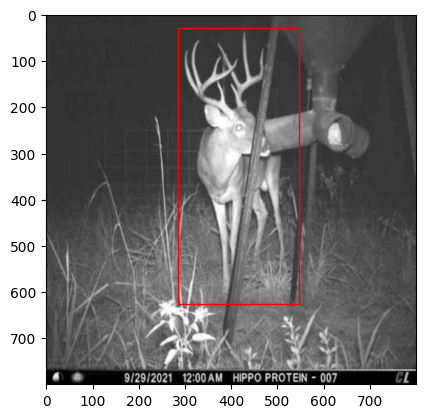

In [14]:
def plot_img_bboxes(img, bboxes):
    fig, ax = plt.subplots()                                    # instantiate axes
    img_tensor = feature_extractor(images=img, return_tensors="pt")['pixel_values'].squeeze(0)
    ax.imshow(img_tensor[0], cmap="gray")                       # image background
    for bbox in bboxes: #updated_dataset["train"]["objects"][2]["bbox"]: # bounding boxes
        print(bbox)
        rect = patches.Rectangle((bbox[0][0], bbox[0][1]), bbox[0][2], bbox[0][3], linewidth=1, edgecolor="r", facecolor="none")
        ax.add_patch(rect)
    plt.show
    pass

i = 77
plot_img_bboxes(updated_dataset["train"][i]["image"], updated_dataset["train"][i]["objects"]["bbox"])

In [26]:
from torch.utils.data import DataLoader
def collate_fn(batch):
    return tuple(zip(*batch))
#def collate_fn(batch):
#    images, targets = zip(*batch)
#    return list(images), list(targets)

# Create the DataLoader
train_loader = DataLoader(dataset['train'], batch_size=2, shuffle=True, collate_fn=collate_fn)
train_loader

In [27]:
for epoch in range(num_epochs):
    model.train()
    for images, targets in train_loader:
        # Your training code here


SyntaxError: incomplete input (672386135.py, line 4)

In [28]:
from transformers import DetrForObjectDetection, DetrConfig
# Load the pre-trained DETR model
config = DetrConfig.from_pretrained("facebook/detr-resnet-50")
model = DetrForObjectDetection(config)
model

DetrForObjectDetection(
  (model): DetrModel(
    (backbone): DetrConvModel(
      (conv_encoder): DetrConvEncoder(
        (model): FeatureListNet(
          (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
          (bn1): DetrFrozenBatchNorm2d()
          (act1): ReLU(inplace=True)
          (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
          (layer1): Sequential(
            (0): Bottleneck(
              (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
              (bn1): DetrFrozenBatchNorm2d()
              (act1): ReLU(inplace=True)
              (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn2): DetrFrozenBatchNorm2d()
              (drop_block): Identity()
              (act2): ReLU(inplace=True)
              (aa): Identity()
              (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      

In [30]:
from transformers import DetrForObjectDetection
# load pretrained model checkpoint
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50")
# Set the model to training mode
model.train()
num_epochs = 1 # 3, 10
# Training loop
for epoch in range(num_epochs):
    for batch in train_loader:
        images, targets = batch                        # Unpack the batch
        outputs = model(images=images, labels=targets) # Forward pass
        loss = outputs.loss                            # Compute loss
        loss.backward()                                # Backward pass
        optimizer.step()                               # Update model parameters
        optimizer.zero_grad()                          # Reset gradient
    # Validation after each epoch (if you have a validation set)
    # Save model after each epoch (or based on certain conditions)

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


ValueError: too many values to unpack (expected 2)